In [19]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For consistency
seed = 3
np.random.seed(3)

## Create Data

In [4]:
#create 8005 ids
n = 8005
sim_ids = np.arange(n)
sim_df = pd.DataFrame(data=sim_ids,columns=['ids'] )
sim_df.head()

,ids
0,0
1,1
2,2
3,3
4,4


In [5]:
#create 2 random normal distributed variables to add in "sim_df"
random_var1 = np.random.normal(0, 5, sim_ids.size)
random_var2 = np.random.normal(4, 2, sim_ids.size)
sim_df['var1'] = pd.Series(random_var1, index=sim_df.index)
sim_df['var2'] = pd.Series(random_var2, index=sim_df.index)

sim_df.head()

,ids,var1,var2
0,0,8.943142,2.140698
1,1,2.182549,1.940463
2,2,0.482487,3.247036
3,3,-9.317464,4.436893
4,4,-1.386941,4.362662


## Get a sample from population

In [7]:
# Getting a random sample of 320 records from the population
n_samples = 320
samples_df = sim_df.sample(n_samples, random_state=seed)
samples_df.describe()

,ids,var1,var2
count,320.000000,320.000000,320.000000
mean,3887.975000,-0.219594,3.900067
std,2326.532383,4.754532,1.972942
min,20.000000,-13.547422,-1.021899
25%,1906.250000,-3.572162,2.729417
50%,3669.000000,0.023301,3.854420
75%,5872.750000,3.221675,5.110317
max,7999.000000,11.494915,10.090702


## Assign group (control or variant) to the sample

In [8]:
is_control = np.random.choice([0,1], size=n_samples)
samples_df = samples_df.assign(is_control=is_control)
samples_df.describe()

,ids,var1,var2,is_control
count,320.000000,320.000000,320.000000,320.000000
mean,3887.975000,-0.219594,3.900067,0.503125
std,2326.532383,4.754532,1.972942,0.500773
min,20.000000,-13.547422,-1.021899,0.000000
25%,1906.250000,-3.572162,2.729417,0.000000
50%,3669.000000,0.023301,3.854420,1.000000
75%,5872.750000,3.221675,5.110317,1.000000
max,7999.000000,11.494915,10.090702,1.000000


In [9]:
samples_df.head()

,ids,var1,var2,is_control
4806,4806,0.057253,4.055807,0
3238,3238,4.342792,3.098467,1
1646,1646,1.614547,3.693947,1
7697,7697,2.376105,5.130229,0
5316,5316,-8.168120,3.359191,0


## Plot visually the distributions

### Variable 1

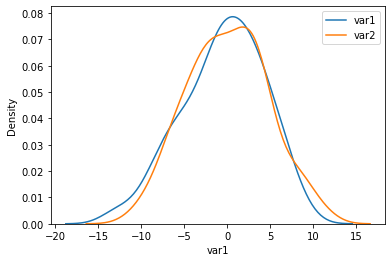

In [18]:
sns.kdeplot(samples_df[samples_df.is_control == 0].var1, label='var1')
sns.kdeplot(samples_df[samples_df.is_control == 1].var1, label='var2')
plt.legend()

### Variable 2

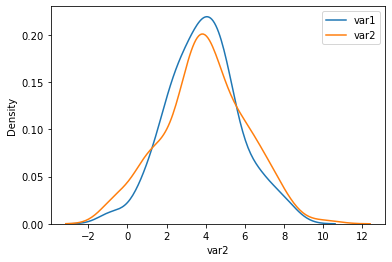

In [17]:
sns.kdeplot(samples_df[samples_df.is_control == 0].var2, label='var1')
sns.kdeplot(samples_df[samples_df.is_control == 1].var2, label='var2')
plt.legend()

### Variable 1 and Variable 2

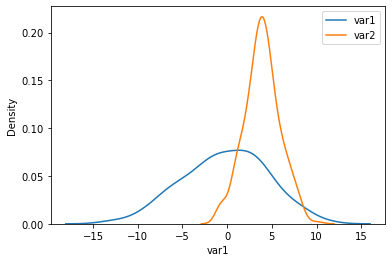

In [16]:
sns.kdeplot(samples_df.var1,label='var1')
sns.kdeplot(samples_df.var2,label='var2')
plt.legend()

## Hypothesis Test

In [21]:
alpha = 0.05

In [22]:
def is_significant(group1, group2, alpha):    
    t,p = stats.ttest_ind(group1,group2,equal_var=False)
    return p<alpha, p

In [23]:
def experiment_vs_control(df, var_name, alpha):
    
    experiment = df[df.is_control == 0][var_name]
    control = df[df.is_control == 1][var_name]
    
    return is_significant(experiment, control, alpha)

### AB Test Variable 1

In [25]:
experiment_vs_control(samples_df, 'var1', alpha)

(False, 0.3291638625540293)

### AB Test Variable 2

In [27]:
experiment_vs_control(samples_df, 'var1', alpha)

(False, 0.3291638625540293)

## Conclusion
### We can't reject the Null hp that the two samples are equally distributed